In [1]:
import numpy as np
from models import SGD
import datasets.read as data
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")
#X, y = data.read_Online_Shoppers_intention("datasets/")

/home/klimek/sem8_v2/aml/aml_projects/Project1/datasets/read.py:122: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace('Osmancik', 0)


## SGD test

In [18]:
m = SGD(iter_limit=500, rate=1E-4, early_stopping=True, diagnostics=True, tol=0.001, mov_avg_window=60, n_iter_no_change=10)
m.fit(X, y)
m.get_params()['coefficients']

Stopping after 273 iterations


array([  -2.28785793,  -35.70200113, -337.50978744,  -46.48035086,
       -179.97440011,   -1.59309822,   48.31107138,   -1.84883097])

<Axes: xlabel='i', ylabel='mov_avg'>

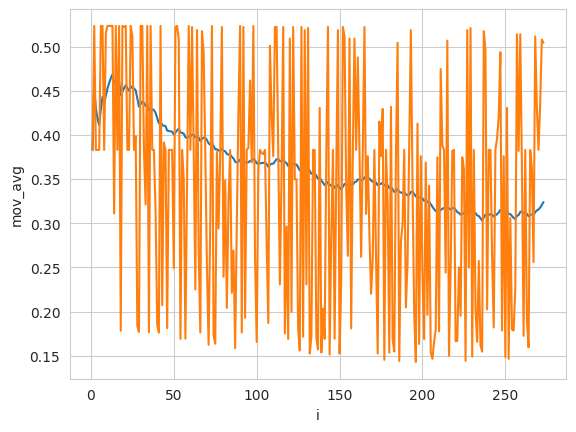

In [19]:
diag = m.get_diagnostics()
diag['i'] = range(1, m._n_iter + 1)
df = pd.DataFrame.from_dict(diag)
df['mov_avg_i'] = df.i // 50
sns.lineplot(data=df, x='i', y='mov_avg')
sns.lineplot(data=df, x='i', y='validation_loss')

<Axes: title={'center': 'Class = 1'}, ylabel='Count'>

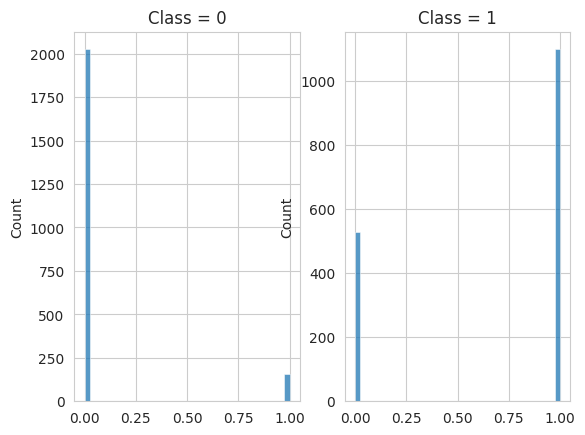

In [20]:
y0 = y==0
y1 = y==1

p0 = m.predict_proba(X[y0])
p1 = m.predict_proba(X[y1])

fig, ax = plt.subplots(1, 2)
ax[0].set_title('Class = 0')
sns.histplot(x=p0, ax=ax[0], binwidth=0.025)
ax[1].set_title('Class = 1')
sns.histplot(x=p1, ax=ax[1], binwidth=0.025)

In [21]:
y_pred = m.predict(X)
1 - np.abs(y_pred - y).mean()

0.8202099737532809

array([  -2.28785793,  -35.70200113, -337.50978744,  -46.48035086,
       -179.97440011,   -1.59309822,   48.31107138,   -1.84883097])

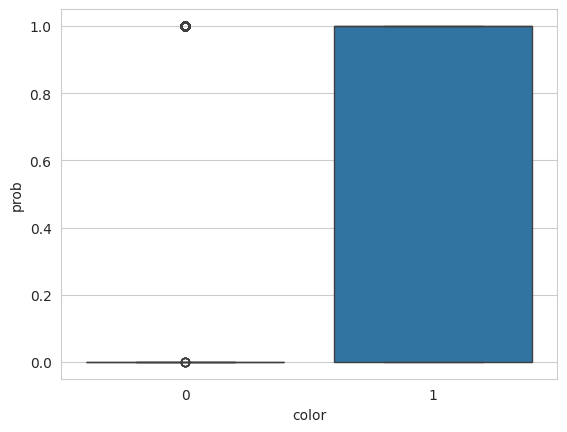

In [22]:
yyy = m.predict_proba(X)
df = pd.DataFrame.from_dict({'prob': yyy, 'color': y})
sns.boxplot(data=df, x='color', y='prob')

(yyy[y1] > 0.99).mean()
perfect_coefs = m.get_params()['coefficients']
perfect_coefs

In [8]:
hist = m._hist_delta
loss = m._loss
history = {
    'norm': [],
    'value': [],
    'iter': []
}

for i, vec in enumerate(hist):
    l1 = np.linalg.norm(vec, ord=1)
    l2 = np.linalg.norm(vec, ord=2)
    lMax = np.linalg.norm(vec, ord=np.inf)

    history['norm'].append('l1')
    history['value'].append(l1)
    history['norm'].append('l2')
    history['value'].append(l2)
    history['norm'].append('Max')
    history['value'].append(lMax)

    history['iter'].append(i+1)
    history['iter'].append(i+1)
    history['iter'].append(i+1)

hdf = pd.DataFrame.from_dict(history)
hdf.shape

AttributeError: 'SGD' object has no attribute '_hist_delta'

In [ ]:
sns.lineplot(data=hdf, x='iter', y='value', hue='norm')

In [ ]:
feats = {
    'fn': [],
    'delta': [],
    'iter': [],
}

for n, vec in enumerate(hist):
    feats['fn'].extend(range(len(vec)))
    feats['delta'].extend(vec)
    feats['iter'].extend(np.repeat(n+1, len(vec)))

df2 = pd.DataFrame.from_dict(feats)

In [ ]:
sns.lineplot(data=df2, x='iter', y='delta', hue='fn')

In [ ]:
band = {
    'indic': [],
    'indic2': [],
    'iter': [],
}

# vec_p = None
# for n, vec in enumerate(hist):
#     if vec_p != None
#         l2 = np.linalg.norm(vec,ord=2)
#         l1 = np.linalg.norm(vec,ord=1)
#         lmax = np.linalg.norm(vec,ord=np.inf)
#         v = np.abs(vec)
#         p = len(v)
#         a = np.sqrt(((p-1)*(l2**2)+lmax**2)/p)
#         b = l1
#         band['indic'].append(np.sqrt(a))
#         band['iter'].append(n+1)
#     vec_p = vec

vec_p = None
vec_p_norm = None
vp_l2 = None
for n, vec in enumerate(hist):
    v_l2 = np.linalg.norm(vec)
    v_norm = vec/v_l2
    if vec_p is not None:
        d = np.dot(v_norm, vec_p_norm)
        v = np.abs(vec)
        p = len(v)
        band['indic'].append(d)
        band['indic2'].append(v_l2/vp_l2)
        band['iter'].append(n+1)
    vec_p = vec
    vec_p_norm = v_norm
    vp_l2 = v_l2

df3 = pd.DataFrame.from_dict(band)
df4 = df3.loc[df3.indic<=-.9]
#sns.scatterplot(data=df4, x='iter', y='indic')
sns.lineplot(data=df3.loc[df4.index], x='iter', y='indic2')

In [ ]:
sns.lineplot(m._loss)

In [ ]:
df = pd.DataFrame.from_dict({'i': range(1, 501), 'loss': loss})
df['mov_avg_i'] = df.i // 10
sns.boxplot(data=df, x='mov_avg_i', y='loss')